### Hypothesis Testing for Olympics 2012 Data

Danu Caus, Massimo Innocentini and Nambiar Shruti Surendrakumar

In [17]:
# Importing required libraries
import math
from scipy import stats
from scipy.stats import distributions as dists
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1234567)

In [18]:
# Reading the data
df = pd.read_excel('London 2012 Olympic alternative medal rankings.xlsx')
df.head()

,ISO,GDP.2011,pop.2010,Country name,NOC,F.2012,M.2012,NOC SIZE,NOC.Size.Per.100K.pop,Gold,...,Population rank score,Athlete rank score,Official medal ranking,GDP rank,Pop rank,Team size rank,Unnamed: 44,"Total medal score (gold=3, silver =2, bronze=1)",Model-based score,Model-based rank
0,USA,1.509400e+13,309349000,US,USA,271,260,531,0.171651,46,...,9.6,62.78,1,66,47,5,NaN,225,-0.725821,107
1,CHN,7.298100e+12,1338300000,China,CHN,208,163,371,0.027722,38,...,1.7,76.09,2,54,73,1,NaN,191,-1.173997,125
2,RUS,1.857770e+12,141750000,Russia,RUS,227,208,435,0.306878,24,...,15.2,50.56,3,36,34,8,NaN,156,-5.829173,169
3,GBR,2.431590e+12,62232000,UK,GBR,269,287,556,0.893431,29,...,29.6,37.36,4,40,20,13,NaN,140,-0.104260,56
4,DEU,3.570560e+12,81777000,Germany,GER,176,219,395,0.483021,11,...,14.9,29.96,5,55,35,19,NaN,85,-0.412898,90


### Hypothesis 1

We want to test that the average winning medal was more than 4 per country. Hence our NULL hypothesis is:
H0 = 4

And the alternative hypothesis is:
Ha > 4

We are going to set the significance level at p < 0.05

We are going to run a one sample Z-Test to gather evidence. We will take a sample size of 30 countries and compare their mean with the population mean. Initially however we're going to "normalize" the data by randomly sampling the total medals of 100 countries and store the mean.

Population stats:
Mean: 4.69158
Median: 4.65
SDev: 0.966127375508 

Z-Score: S100    3.010376
dtype: float64
P-Value: [ 0.00130462]


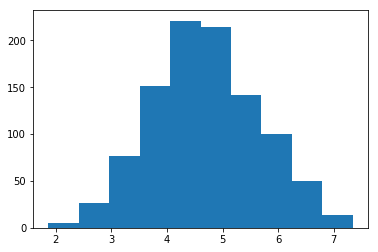

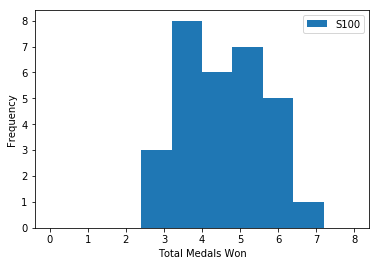

In [19]:
df_clt = pd.DataFrame(columns=['S100'])
for i in range(1000):
    df_clt.loc[i] = [df['Total'].sample(n=100).mean()]
    
plt.hist(df_clt['S100'])
pop_mean = df_clt['S100'].mean()
pop_median = df_clt['S100'].median()
pop_sdev = df_clt['S100'].std()
print("Population stats:")
print('Mean:', pop_mean)
print('Median:', pop_median)
print('SDev:', pop_sdev, "\n")

# Now we can assume our data is normally distributed and proceed to sample our data
sample = df_clt.sample(n=30)
ax = sample.plot.hist(bins=10, range=(0,8))
ax.set_xlabel("Total Medals Won")
ax.set_ylabel("Frequency")

# From the sample extracted we can now compute the Z-Score.
z = (sample.mean() - 4) / (pop_sdev / np.sqrt(len(sample)))
print('Z-Score:', z) 
print('P-Value:',(stats.norm.sf(abs(z))))

Now we have both the Z-Score and the P-Value. 
It is a one sided test hence we are only interested in the right tail.
The P-Value in this case indicates the probability that a country wins at least 4.6 medals (the mean of the populatino of total medals won).
At the beginning we decided on a P-value of < 0.05 hence in one instance we had a P = 0.0031, in that case we could reject the null hypothesis and state that evidence suggest that each country in average does indeed win more than 4 medals.

### Hypothesis 2

H0: In case of all teams that received at least one medal: Female vs Team Size Ratio does NOT influence the Bronze vs Total Medals Ratio

H1: In case of all teams that received at least one medal: Female vs Team Size Ratio has an impact on the Bronze vs Total Medals Ratio

These ratios were chosen to be the random variables X and Y because they are the only ones that follow a normal distribution in the given excel file. This factor is important in order to be able to apply "Fisher's transform"

At least one medal count sample size:  85
Females to total team size ratio is normal distribution
Bronze Medal Count / Total nr of medals ratio is normal distribution
count    85.000000
mean      0.405558
std       0.129589
min       0.071429
25%       0.312500
50%       0.425000
75%       0.483813
max       0.727273
dtype: float64
count    85.000000
mean      0.438091
std       0.297313
min       0.000000
25%       0.261364
50%       0.416667
75%       0.600000
max       1.000000
dtype: float64


(array([ 14.,   9.,  22.,  17.,   9.,   3.,  11.]),
 array([ 0.        ,  0.14285714,  0.28571429,  0.42857143,  0.57142857,
         0.71428571,  0.85714286,  1.        ]),
 <a list of 7 Patch objects>)

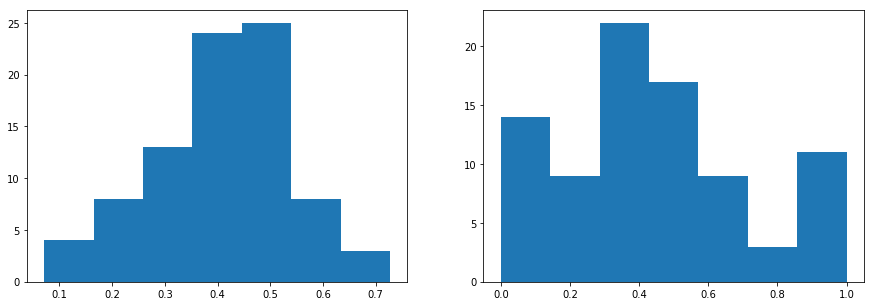

In [20]:
# To strip the columns with 0 total medal count, so as to not divide by 0 later on
df_rm = df[df['Total']>0]
print("At least one medal count sample size: ", len(df_rm))

# nr of females / total team size
df_ftsratio = df_rm['F.2012']/df_rm['NOC SIZE'] 

# Check for normalcy
z1, pval1 = stats.mstats.normaltest(df_ftsratio.values) 

desc = "Females to total team size ratio is"
if pval1 < 0.055:
    print(desc, "not normal distribution")
else:
    print(desc, "normal distribution")
    
# Bronze Medal Count / Total nr of medals
df_btmratio = df_rm['Bronze.Per.100K.pop']/df_rm['Total.Per.100K.pop'] 

z2, pval2 = stats.mstats.normaltest(df_btmratio.values) # Check for normalcy

desc = "Bronze Medal Count / Total nr of medals ratio is"
if pval2 < 0.055:
    print(desc, "not normal distribution")
else:
    print(desc, "normal distribution")
    
print(df_ftsratio.describe())
print(df_btmratio.describe())

fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(df_ftsratio, bins=7)
axs[1].hist(df_btmratio, bins=7)

Because we are dealing with 2 normally distributed random variables, we can apply the "Fisher's transform"

correlation= -0.0984936628005
ze= -0.09881402530774326
confidence= 0.460642966205


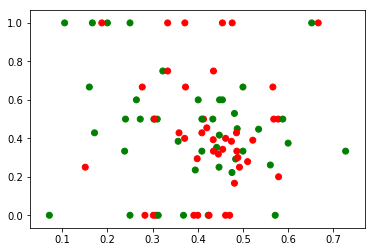

In [21]:
# Calculate Pearson's Correlation Factor
correlation = df_ftsratio.corr(df_btmratio, method='pearson')
print("correlation=",correlation)

# We can see they are uncorrelated. Let's plot to convince ourselves:
plt.scatter(df_ftsratio, df_btmratio, c=['red', 'green'])

# Fisher's transform; log stands for ln here
ze = 0.5 * math.log((1+correlation)/(1-correlation))
print("ze=", ze)

# We are -0.098 standard deviations from the "true" mean
confidence = stats.norm.cdf(ze) 
print("confidence=",confidence)

The ze value implies that: H0 falls in the 95% confidence range, so we accept H0.
Female vs Team Size Ratio does NOT influence the Bronze vs Total Medals Ratio

### Hypothesis 3 

We want to test the (alternative) hypothesis that the average number of male atheletes for non-EU countries differs from the overall average. The null hypothesis is that there is no difference between the averages.

A one-sample t-test is used here to check whether the sample mean differs from the population mean. We conduct the test at a 95% confidence level to see if we can reject the null hypothesis.

Note - ISO codes source: http://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=141329 

In [22]:
eu_iso_list = ['AUT', 'BEL', 'BGR', 'HRV', 'CYP', 'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 
               'ITA', 'LVA', 'LTU', 'LUX', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP', 'SWE', 'GBR']

non_eu_ma =  df[~df['ISO'].isin(eu_iso_list)]['M.2012']
pop_ma = df['M.2012']

print("Non-EU sample size", len(non_eu_ma))

Non-EU sample size 176


We can check the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom:

In [23]:
print(stats.t.ppf(q=0.025, df=175), stats.t.ppf(q=0.975, df=175)) #two-tailed

-1.97361246195 1.97361246195


In [24]:
stats.ttest_1samp(a= non_eu_ma, popmean= pop_ma.mean()) 

Ttest_1sampResult(statistic=-2.4138090805152563, pvalue=0.016817946502217403)

The test statistic t= -2.4138 tells us how much the sample mean deviates from the null hypothesis. If the t-statistic falls outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. 

A p-value of 0.01681 means we'd expect to see data as extreme as our sample due to chance about 1.6% of the time if the null hypothesis was true. 

In this case, the test statistic falls outside the quantiles of the t-distribution and the p-value is lower than our significance level α=0.05, so we should reject the null hypothesis that there is no difference in the mean number of male athetheltes between the Non-EU sample and the overall population.

### Hypothesis 4

We would like to test the hypothesis that there is a difference in the total medal count when this count is adjusted for GDP compared to when it's adjusted for Population. 

The null hypothesis is that there is no difference between the two types of medal counts. 

A level of significance of 0.05 is chosen.

In [25]:
gdp_sample = df['Total.GDP']
pop_sample = df['Total.pop']

# Finding the difference between the two counts 
medal_count_df = pd.DataFrame({"Total.GDP" : gdp_sample,
                               "Total.pop" : pop_sample,
                               "Difference": gdp_sample - pop_sample})

# Check a summary of the data
medal_count_df.describe()

,Difference,Total.GDP,Total.pop
count,204.000000,204.000000,204.000000
mean,0.001373,4.716078,4.714706
std,8.875720,14.463057,11.528477
min,-29.610000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,2.025000,4.150000
max,48.150000,123.930000,111.900000


The summary above shows that there is a 0.001373 difference on average between the two types of medal counts. Let's conduct a paired t-test to see whether this difference is significant at a 95% confidence level.

In [26]:
paired_sample = stats.ttest_rel(gdp_sample, pop_sample)
print("t-statistic: %.4f and p-value: %.4f" % paired_sample)

# Finding the critical t value for 0.05 signiﬁcance level and degree of freedom 203 
tcritical = dists.t.ppf(1-0.05/2, 203) #two-tailed
print("t-critical:", tcritical)

t-statistic: 0.0022 and p-value: 0.9982
t-critical: 1.97171884846


The t-value falls in the acceptance region i.e. between 1.9717 and -1.9717 critical t-values and the p-value = 0.9982 is higher than the chosen significance level, hence, we cannot reject reject the null hypothesis. 

In this context, we can say that the mean difference between the GDP adjusted medal count and the Population adjusted medal count is not significant.